# 1. Credit Risk Dataset

Dataset from Kaggle: https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis/data

This is a credit risk analysis dataset we found on Kaggle. This dataset provides essential information about loan applicants and their characteristics, including their loan rate, income, age, credit length, etc.
This dataset provides a simplified view of the factors contributing to credit risk, presenting an excellent opportunity for us to apply our machine learning analysis in determining whether a loan applicant is likely to default.


Column Descriptions:
    
* ID: Unique identifier for each loan applicant.
* Age: Age of the loan applicant.
* Income: Income of the loan applicant.
* Home: Home ownership status (Own, Mortgage, Rent).
* Emp_Length: Employment length in years.
* Intent: Purpose of the loan (e.g., education, home improvement).
* Amount: Loan amount applied for.
* Rate: Interest rate on the loan.
* Status: Loan approval status (Fully Paid, Charged Off, Current).
* Percent_Income: Loan amount as a percentage of income.
* Default: Whether the applicant has defaulted on a loan previously (Yes, No).
* Cred_Length: Length of the applicant's credit history.

# 2. Loading Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("credit_risk.csv")

# 3. Dataset Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df.Status.value_counts()

Status
0    25473
1     7108
Name: count, dtype: int64

# 4. Neccessary Data Preprocessing
These are the bare minimum data preprocessing requirements in order to run our benchmark models.

### Transforming categorical variables

In [ ]:
# We use pd.get_dummies function to transform our categorical columns using dummy variables

df_encoded = pd.get_dummies(df, columns=["Home", "Intent"], drop_first=True)
df_encoded['Default'] = [1 if i == "Y" else 0 for i in df['Default']]

In [ ]:
df_encoded.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


### Replacing missing values

In [ ]:
df_encoded.isnull().sum()

Id                           0
Age                          0
Income                       0
Emp_length                 895
Amount                       0
Rate                      3116
Status                       0
Percent_income               0
Default                      0
Cred_length                  0
Home_OTHER                   0
Home_OWN                     0
Home_RENT                    0
Intent_EDUCATION             0
Intent_HOMEIMPROVEMENT       0
Intent_MEDICAL               0
Intent_PERSONAL              0
Intent_VENTURE               0
dtype: int64

In [ ]:
#We use SimpleImputer to fill in the missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [ ]:
df_imputed.isnull().sum()

Id                        0
Age                       0
Income                    0
Emp_length                0
Amount                    0
Rate                      0
Status                    0
Percent_income            0
Default                   0
Cred_length               0
Home_OTHER                0
Home_OWN                  0
Home_RENT                 0
Intent_EDUCATION          0
Intent_HOMEIMPROVEMENT    0
Intent_MEDICAL            0
Intent_PERSONAL           0
Intent_VENTURE            0
dtype: int64

### Duplicate values

In [ ]:
# There is no duplicates so no action needed here
df_imputed.duplicated().sum()

0

### Dropping Id column

In [ ]:
# Id column does not provide any useful information so we drop it
# df_cleaned will be our initial model dataset from this point
df_cleaned = df_imputed.drop(["Id"], axis=1)

# 5. Data Visualization

In [ ]:
# Importing our visualization packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Numerical Columns

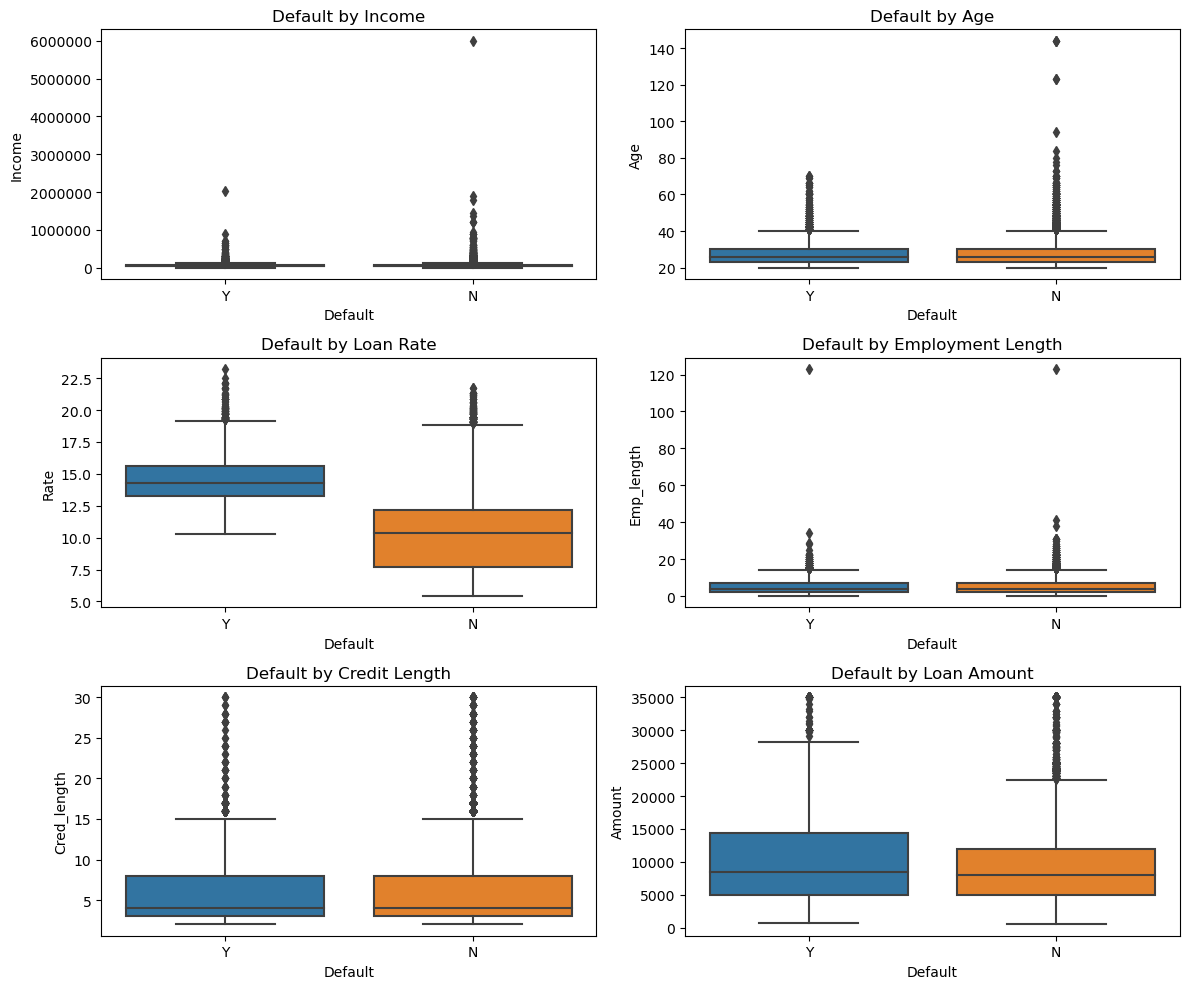

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(data = df, x="Default", y="Income", ax=axes[0,0])
axes[0,0].set_title("Default by Income")
axes[0,0].ticklabel_format(style='plain', axis='y')

sns.boxplot(data = df, x="Default", y="Age", ax=axes[0,1])
axes[0,1].set_title("Default by Age")

sns.boxplot(data = df, x="Default", y="Emp_length", ax=axes[1,1])
axes[1,1].set_title("Default by Employment Length")

sns.boxplot(data = df, x="Default", y="Rate", ax=axes[1,0])
axes[1,0].set_title("Default by Loan Rate")

sns.boxplot(data = df, x="Default", y="Amount", ax=axes[2,1])
axes[2,1].set_title("Default by Loan Amount")

sns.boxplot(data = df, x="Default", y="Cred_length", ax=axes[2,0])
axes[2,0].set_title("Default by Credit Length")

plt.tight_layout()

### Categorical columns

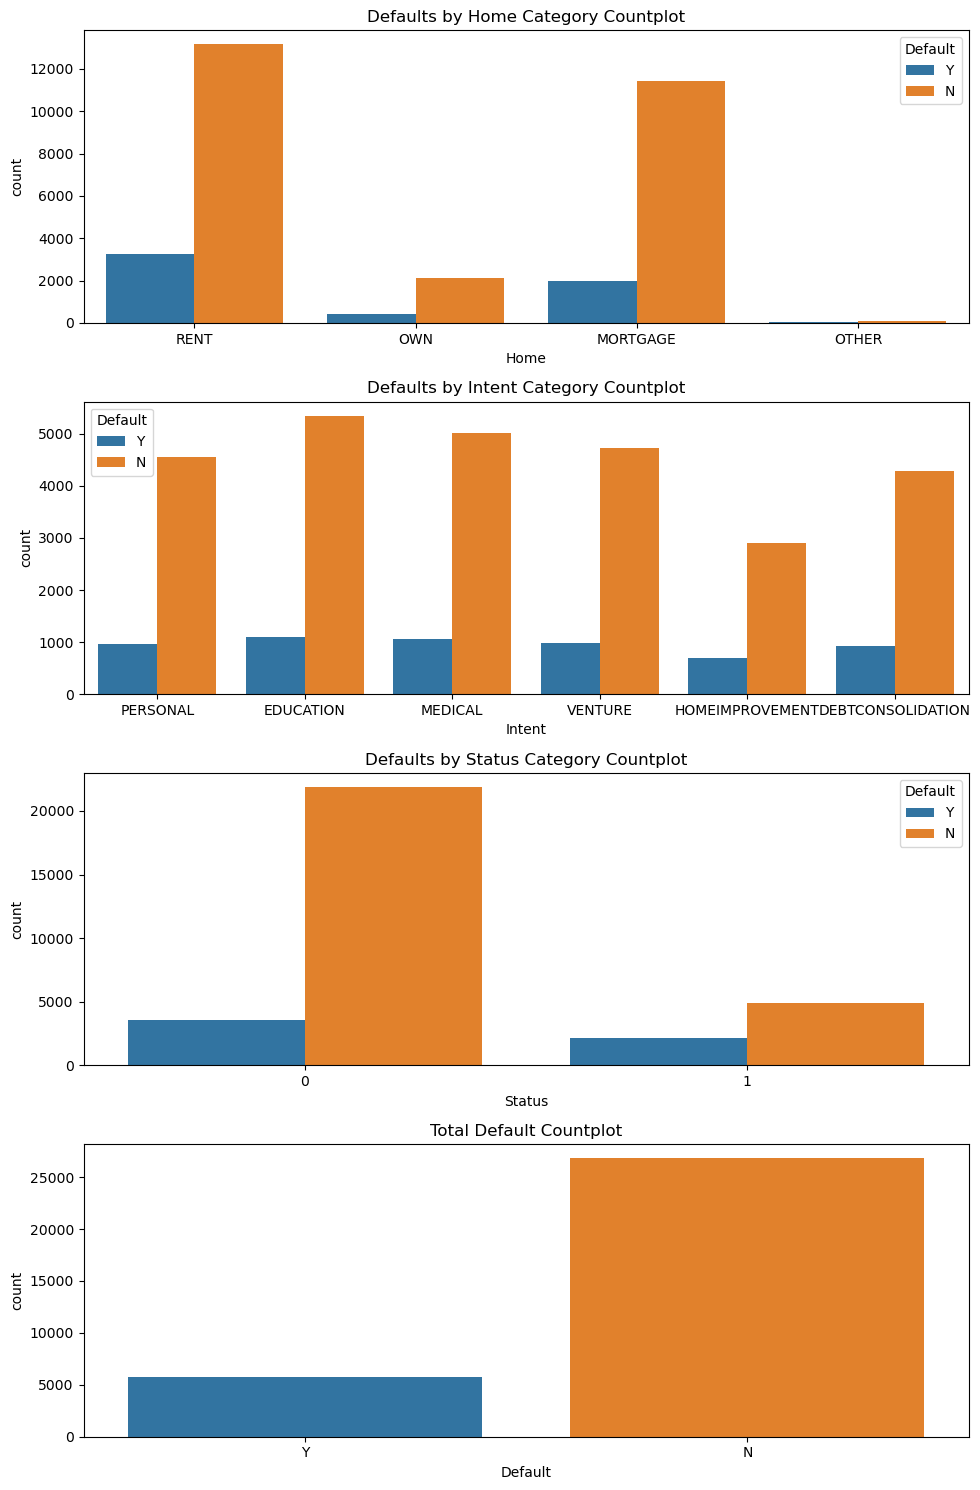

In [ ]:
# We are using df because it contains the un-transformed categorical data
fig, axes = plt.subplots(4,1, figsize=(10,15))
sns.countplot(x=df["Home"], hue=df['Default'], ax=axes[0])
axes[0].set_title("Defaults by Home Category Countplot")

sns.countplot(x=df["Intent"], hue=df['Default'], ax=axes[1])
axes[1].set_title("Defaults by Intent Category Countplot")

sns.countplot(x=df["Status"], hue=df['Default'], ax=axes[2])
axes[2].set_title("Defaults by Status Category Countplot")

sns.countplot(x=df["Default"], ax=axes[3])
axes[3].set_title("Total Default Countplot")

plt.tight_layout()
plt.show()

### Visualization of our cleaned dataset

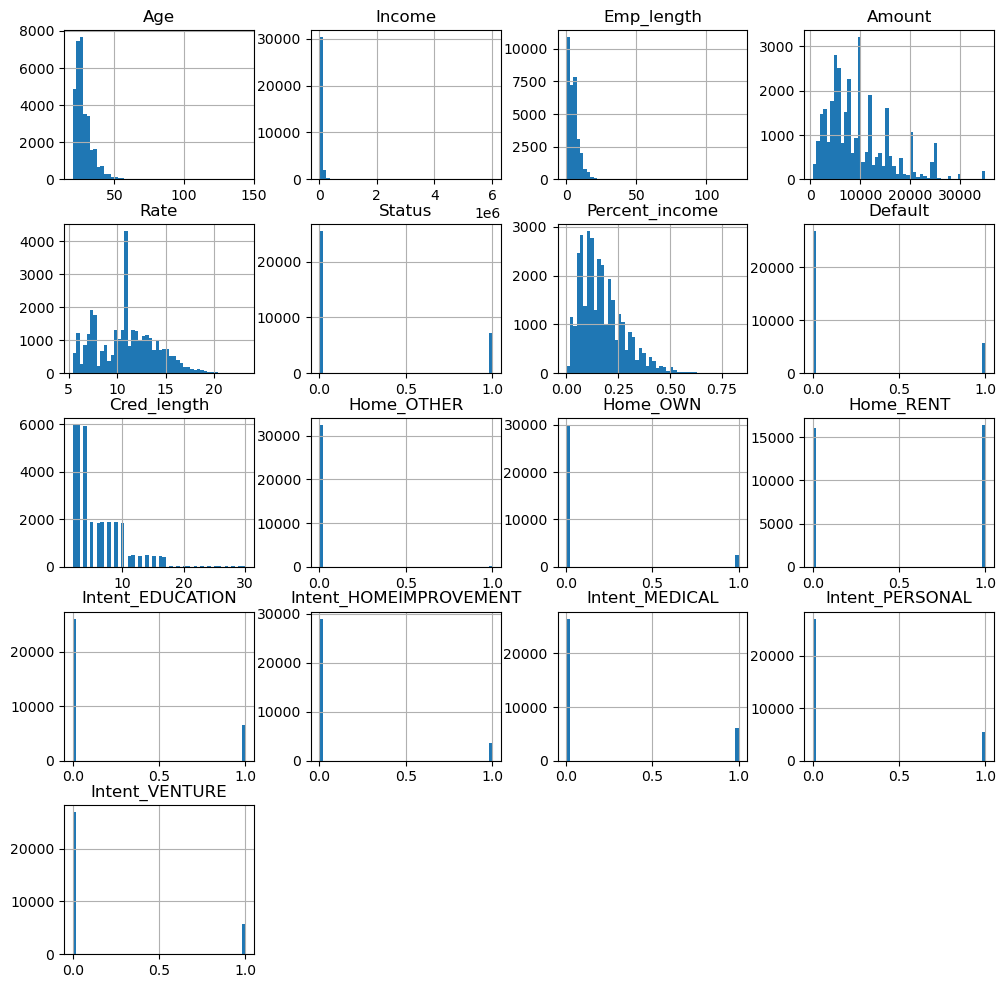

In [ ]:
df_cleaned.hist(bins=50, figsize=(12,12))
plt.show()

### Correlation of features

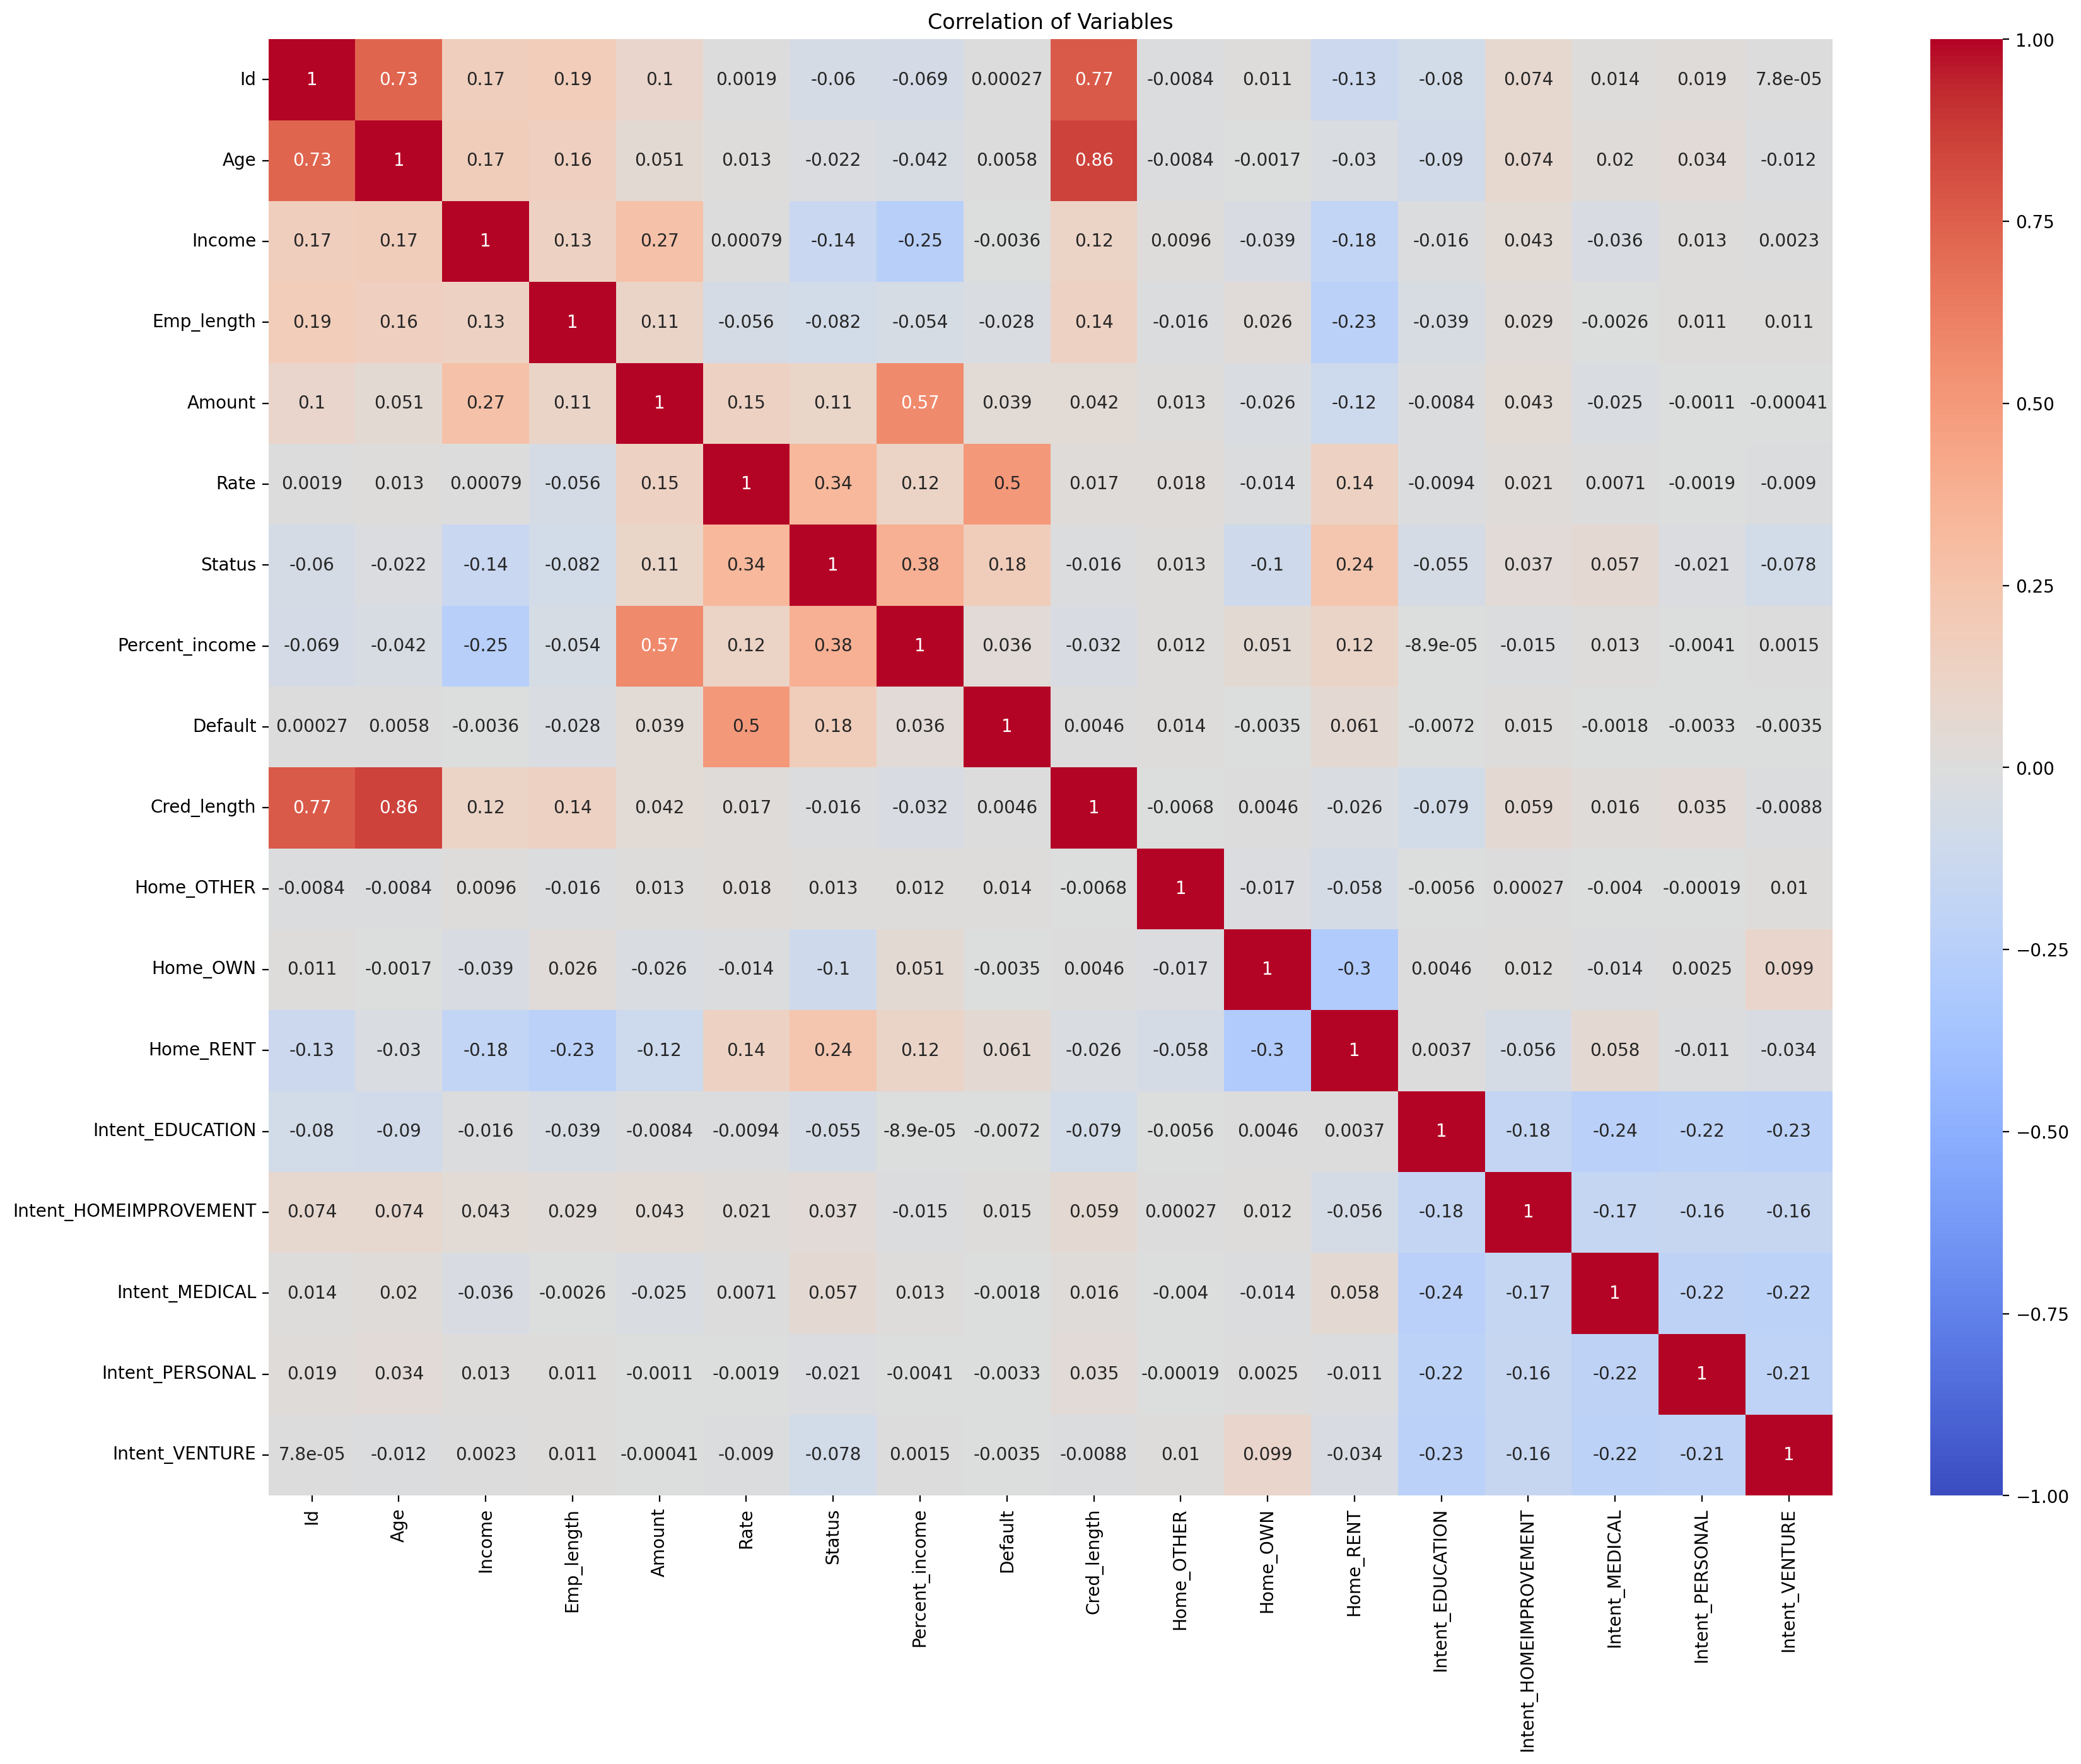

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 15), dpi=200)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Variables')
plt.show()

# 6. Benchmark Models

We are running our model on the data with the minimum amount of pre-processing required, as we are unable to run the model without filling in missing values and transforming the categorical variables.

### Importing packages

In [ ]:
# Import necessary machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Training and testing data

In [ ]:
#Split data into x (features) and y (target)
X = df_cleaned.drop(columns=['Default'])
y = df_cleaned['Default']

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Benchmark 1: Random Forest Classifier

### Building the model

In [ ]:
# Fitting our Random Forest model on our training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Getting our prediction
rf_pred = rf_model.predict(X_test)

### Classification report

In [ ]:
# Classification report
print(f"Classification Report:\n{classification_report(y_test, rf_pred)}")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89      5322
         1.0       0.52      0.39      0.45      1195

    accuracy                           0.82      6517
   macro avg       0.70      0.65      0.67      6517
weighted avg       0.81      0.82      0.81      6517

Accuracy: 0.8229246585852386


### Confusion matrix

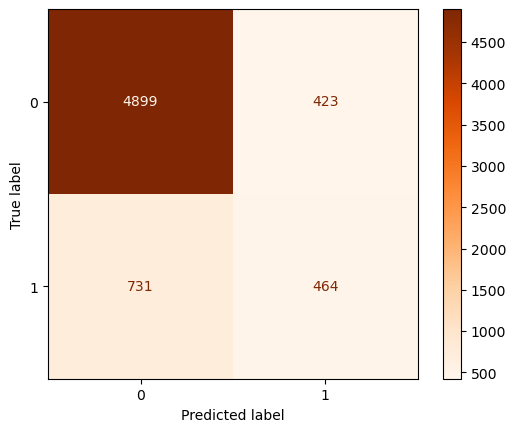

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### Feature Importance

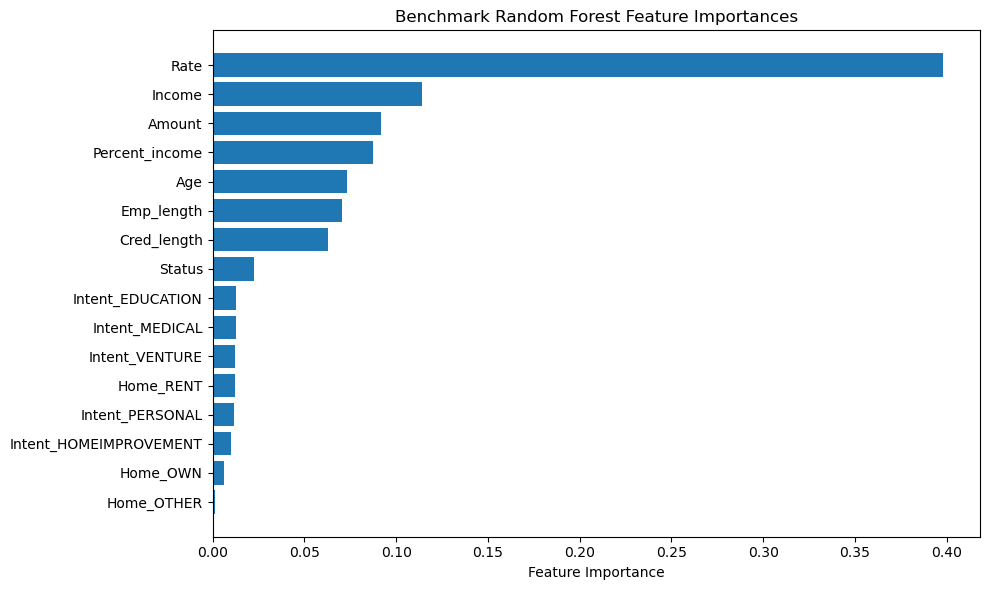

In [ ]:
# Plot feature importances
rf_feature_importances = rf_model.feature_importances_
rf_feature_names = X.columns
sorted_idx = np.argsort(rf_feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), rf_feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [rf_feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Benchmark Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# Benchmark 2: Logistic Regression

### Building the model

In [ ]:
# Apply logistic regression model to training data
logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model.fit(X_train, y_train)

# Getting our prediction
logreg_pred = logreg_model.predict(X_test)

### Classification report

In [ ]:
# Classification report
print(f"Classification Report:\n{classification_report(y_test, logreg_pred)}")
print(f"Accuracy: {accuracy_score(y_test, logreg_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      5322
         1.0       0.52      0.10      0.16      1195

    accuracy                           0.82      6517
   macro avg       0.67      0.54      0.53      6517
weighted avg       0.77      0.82      0.76      6517

Accuracy: 0.8178609789780574


### Confusion matrix

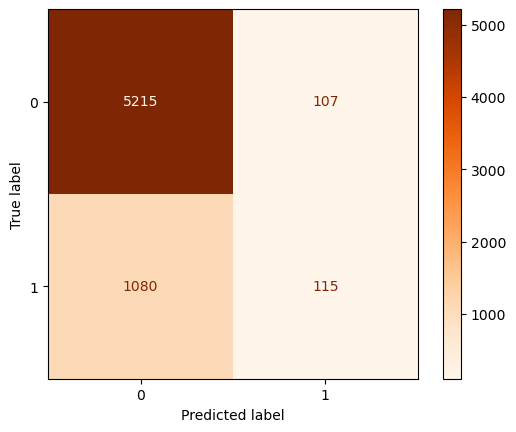

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

# Benchmark 3: Naive Bayes

### Building the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [ ]:
# Build Naive Bayes Classifier model and fit to our training data
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Getting our prediction
nb_pred = nb_model.predict(X_test)

### Classification report

In [ ]:
print(f"Classification Report:\n{classification_report(y_test, nb_pred)}")
print(f"Accuracy: {accuracy_score(y_test, nb_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.52      0.64      5322
         1.0       0.20      0.53      0.29      1195

    accuracy                           0.52      6517
   macro avg       0.52      0.53      0.47      6517
weighted avg       0.72      0.52      0.58      6517

Accuracy: 0.5232468927420593


### Confusion matrix

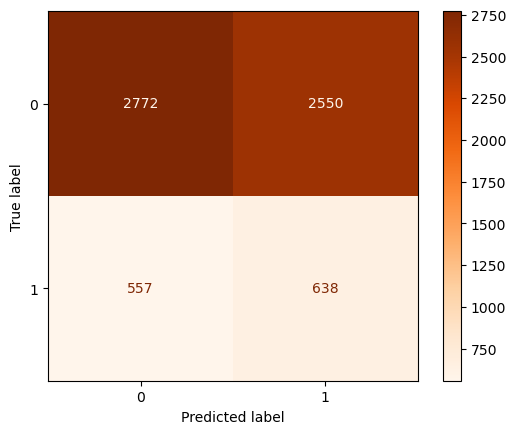

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, nb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

# Benchmark 4: XGBoost

### Building the model

In [ ]:
# Installing and importing xgboost
!pip install xgboost
import xgboost as xgb

In [ ]:
# Fitting our model on our initial training data
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Getting our predication
xgb_pred = xgb_model.predict(X_test)

### Confusion matrix

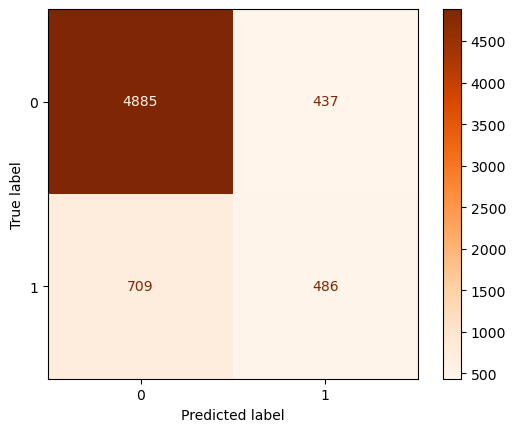

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### Classification report

In [ ]:
print(f"Classification Report: \n{classification_report(y_test, xgb_pred)}")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90      5322
         1.0       0.53      0.41      0.46      1195

    accuracy                           0.82      6517
   macro avg       0.70      0.66      0.68      6517
weighted avg       0.81      0.82      0.82      6517

Accuracy: 0.8241522172778886


## Models Performance Visualization

### AUROC graph

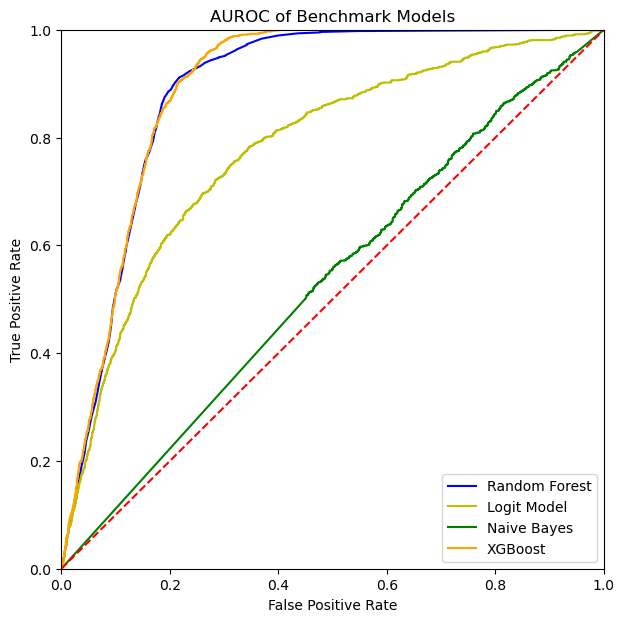

In [ ]:
pred1 = rf_model.predict_proba(X_test)
pred2 = logreg_model.predict_proba(X_test)
pred3 = nb_model.predict_proba(X_test)
pred4 = xgb_model.predict_proba(X_test)

#Plot AUC-ROC
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, pred1[:,1])
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(y_test, pred2[:,1])
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)

false_positive_rate_3, true_positive_rate_3, thresholds_3 = roc_curve(y_test, pred3[:,1])
roc_auc_3 = auc(false_positive_rate_3, true_positive_rate_3)

false_positive_rate_4, true_positive_rate_4, thresholds_4 = roc_curve(y_test, pred4[:,1])
roc_auc_4 = auc(false_positive_rate_4, true_positive_rate_4)

plt.figure(figsize=(7,7))
plt.title('AUROC of Benchmark Models')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b', label = 'Random Forest'  % roc_auc_1)
plt.plot(false_positive_rate_2, true_positive_rate_2, 'y', label = 'Logit Model'  % roc_auc_2)
plt.plot(false_positive_rate_3, true_positive_rate_3, 'g', label = 'Naive Bayes'  % roc_auc_3)
plt.plot(false_positive_rate_4, true_positive_rate_4, 'orange', label = 'XGBoost'  % roc_auc_4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 7. Improving Models Through Preprocessing

# a. Improving Random Forest Model

## RF Model Results from Scaling Data, Optimizing Parameters, and Cross Validation

### Scaling data

In [ ]:
# Standardizing our data using StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Optimizing parameters with scaled data

In [ ]:
# Use GridSearchCV to find optimal parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split' : [2, 5, 0],
    'min_samples_leaf' : [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

### Cross validation

In [ ]:
# Check our cross validation scores after performing GridSearchCV
from sklearn.model_selection import cross_val_score

best_model = grid_search.best_estimator_
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)

### Results

In [ ]:
# Fitting our Random Forest model on our training data with optimal parameters
new_rf_model = RandomForestClassifier(n_estimators = 200, max_depth=15, min_samples_leaf = 1, min_samples_split = 5, random_state=42)
new_rf_model.fit(X_train_scaled, y_train)

# Getting our prediction and classification report
new_rf_pred = new_rf_model.predict(X_test_scaled)
print(f"Classification Report:\n{classification_report(y_test, new_rf_pred)}")
print(f"Accuracy: {accuracy_score(y_test, new_rf_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, new_rf_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

This improved our original benchmark by about 0.003

### Using BalancedRandomForest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      5322
         1.0       0.50      0.90      0.64      1195

    accuracy                           0.81      6517
   macro avg       0.73      0.85      0.76      6517
weighted avg       0.88      0.81      0.83      6517

Accuracy: 0.8134110787172012


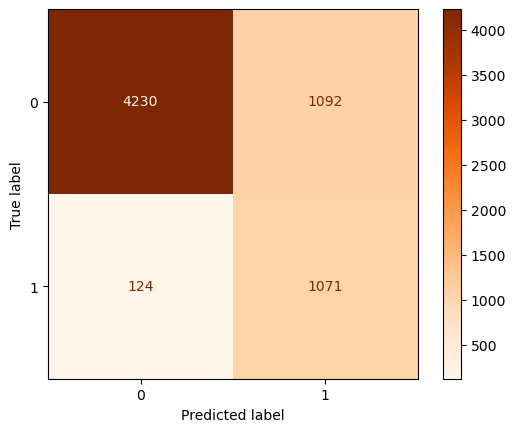

In [ ]:
# Import module
from imblearn.ensemble import BalancedRandomForestClassifier

# Fit our balanced rf model on training data
brfc = BalancedRandomForestClassifier(random_state=42)
brfc.fit(X_train, y_train)

# Our prediction
brfc_pred = brfc.predict(X_test)

# Classification report and confusion matrix
print(f"Classification Report:\n{classification_report(y_test, brfc_pred)}")
print(f"Accuracy: {accuracy_score(y_test, brfc_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, brfc_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])


Although our accuracy decreased by a small margin, we were able to minimize our amount of FN at the cost of predicting more FP.

# b. Improving Logistic Regression Model

## Logistic Regression Model Results from Scaling Data and Regularization

### Scaling data

In [ ]:
# In case our data units are biased, we standardize it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regularization to prevent overfitting

In [ ]:
# Utilize lasso (l1) regularization and the C parameters
new_logreg_model = LogisticRegression(penalty='l1', C=1, solver='liblinear', random_state=42)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.62      0.75      5322
         1.0       0.35      0.91      0.50      1195

    accuracy                           0.67      6517
   macro avg       0.66      0.76      0.63      6517
weighted avg       0.86      0.67      0.71      6517

Accuracy: 0.6702470461868958


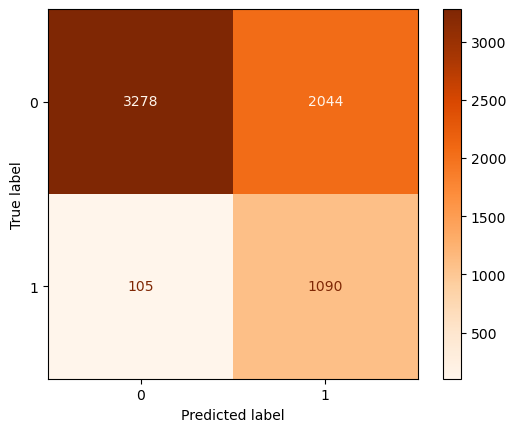

In [ ]:
# Fitting new model on our updated training data
new_logreg_model.fit(X_train_scaled, y_train)
new_logreg_pred = logreg_model.predict(X_test_scaled)

print(f"Classification Report:\n{classification_report(y_test, new_logreg_pred)}")
print(f"Accuracy: {accuracy_score(y_test, new_logreg_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, new_logreg_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

This greatly decreased our accuracy compared to our benchmark accuracy of 0.82. We were also able to greatly decrease our FN, but as a result increased our FP predictions.

# c. Improving Naive Bayes Model

## Naive Bayes Model Result from Feature Selection

### Feature Selection using Wrapper Method (Forward Selection)

In [ ]:
# Importing feature selection package
from sklearn.feature_selection import SequentialFeatureSelector
fsSvm = SequentialFeatureSelector(nb_model, scoring='recall', n_features_to_select=4)
fsSvm.fit(X_train, y_train)

In [ ]:
# Selected Features
selectedFeatureIndices = fsSvm.get_support(indices=True)
selectedFeatureColNames = X_train.columns[selectedFeatureIndices]
print("Selected Features(Forward selection):")
list(selectedFeatureColNames)

In [ ]:
# Create new df with only the subset containing 8 attributes
new_df = df[['Age', 'Income', 'Amount', 'Rate', 'Default']]
new_df.head()

In [ ]:
new_df['Default'] = [1 if i == "Y" else 0 for i in new_df['Default']]

new_df['Rate'].fillna(new_df['Rate'].mean(), inplace=True)

new_df.head()

In [ ]:
#Split data into x (features) and y (target)
nb_x = new_df.drop(columns=['Default'])
nb_y = new_df['Default']

# Create training and test sets
x_nbtrain, x_nbtest, y_nbtrain, y_nbtest = train_test_split(nb_x, nb_y, test_size=0.2, random_state=42)

In [ ]:
# Build new Naive Bayes Classifier
new_nb_model = MultinomialNB()

# Fit the model to our new training data
new_nb_model.fit(x_nbtrain, y_nbtrain)

# Getting our new prediction
new_nb_pred = new_nb_model.predict(x_nbtest)

# Classification report
print(f"Classification Report:\n{classification_report(y_nbtest, new_nb_pred)}")
print(f"Accuracy: {accuracy_score(y_nbtest, new_nb_pred)}")

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, nb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

This improved our original benchmark model by 0.0005

## Naive Bayes Model Result from Parameter Optimization and CV

### Utilizing parameter optimization and cross-validation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.02, 0.1, 0.5, 1.0, 2.0, 5.0],  # Example parameter for MultinomialNB, adjust as needed
    # Add more parameters here
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Get the best estimator from the grid search
best_nb_model = grid_search.best_estimator_

# Make predictions on the test set
new_nb_pred = best_nb_model.predict(X_test)

# Assess the accuracy
print(f"Accuracy: {accuracy_score(y_test, new_nb_pred)}")

We can see that optimizing parameters did mot improve our model compared to feature selection

##  Bayes Model Result from Logarithmic Scaling, Standardizing, and SMOTE

In [ ]:
# Install SMOTE package to resample data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Introduce new resampled training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale the data, including test data after resampling it to see if it further improves the model
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      5322
         1.0       0.33      0.44      0.38      1195

    accuracy                           0.73      6517
   macro avg       0.60      0.62      0.60      6517
weighted avg       0.77      0.73      0.75      6517

Accuracy: 0.7334663188583704


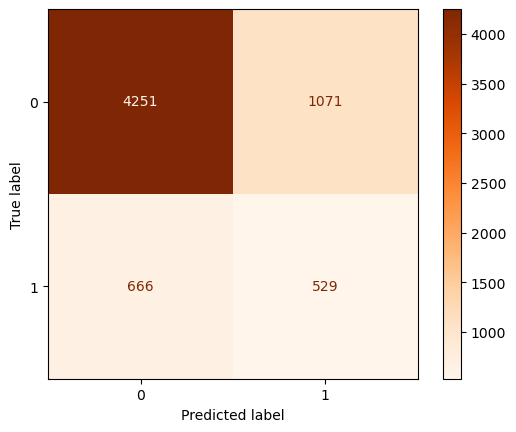

In [ ]:
# Fit the new model to our scaled training data
smote_nb_model = MultinomialNB()
smote_nb_model.fit(X_resampled , y_resampled)

# Getting our new prediction
smote_nb_pred = smote_nb_model.predict(X_test_scaled)

# Classification report
print(f"Classification Report:\n{classification_report(y_test, smote_nb_pred)}")
print(f"Accuracy: {accuracy_score(y_test, smote_nb_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, smote_nb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

This version of our naive bayes model produced the best precision scores for both classes. Although it doesn't have a higher overall accuracy than the logarithmic scaled and standardized models, they only predicted all data as "0" class due to the class imbalance. Therefore, by combining all the techniques, we produced a better overall model.

# d. Improving XGBoost Model

## XGBoost Model Result from Adjusting Class Weights, Resampling, and Scaling

### Adjusting class weights

In [ ]:
# This makes it so the "1" class is more weighted than the 0 since our model
# has trouble predicting the "1" class
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

### Resampling using SMOTE and scaling data

In [ ]:
# Introduce new resampled training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale the data, including test data after resampling it to see if it further improves the model
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      5322
         1.0       0.52      0.83      0.64      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.83      0.76      6517
weighted avg       0.87      0.83      0.84      6517

Accuracy: 0.8264538898266073


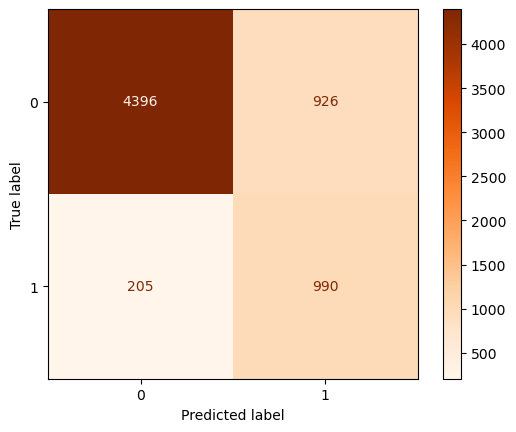

In [ ]:
# Implementing our new model on the resampled and scaled data
new_xgb_model = xgb.XGBClassifier(scale_pos_weight=3, random_state=42)
new_xgb_model.fit(X_resampled_scaled, y_resampled)

# Getting our new prediction
new_xgb_pred = new_xgb_model.predict(X_test_scaled)

# Classification report
print(f"Classification Report: \n{classification_report(y_test, new_xgb_pred)}")
print(f"Accuracy: {accuracy_score(y_test, new_xgb_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, new_xgb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

This is our adjusted model after addressing class imbalance issues. Because our positive class "1" is underrepresented, we increase the value of "scale_post_weight" to 3 from its default value of 1. As shown, we increased our predication accuracy of the "1" class.

## XGBoost Result from Adjusting Predictability Threshold

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      5322
         1.0       0.53      0.78      0.63      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.81      0.76      6517
weighted avg       0.87      0.83      0.84      6517

Accuracy: 0.8307503452508823


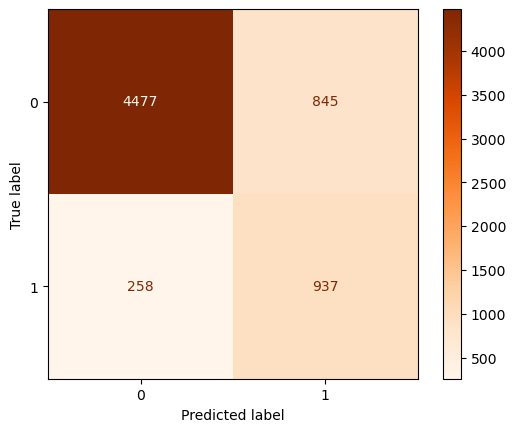

In [ ]:
# Get predicted probabilities
y_probs = new_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold
adj_xgb_pred = (y_probs > 0.57).astype(int)

print(f"Classification Report: \n{classification_report(y_test, adj_xgb_pred)}")
print(f"Accuracy: {accuracy_score(y_test, adj_xgb_pred)}")
ConfusionMatrixDisplay.from_predictions(y_test, adj_xgb_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

Adjusting the threshold on the scaled training data does produce a noticable difference. It produces the highest accuracy at the threshold y_probs > 0.57. We also increased our "1" class precision from this method.

## Improved Models Visualization

In [ ]:
pred1 = brfc.predict_proba(X_test)
pred2 = new_logreg_model.predict_proba(X_test_scaled)
pred3 = smote_nb_model.predict_proba(X_test_scaled)
pred4 = new_xgb_model.predict_proba(X_test_scaled)

#Plot AUC-ROC
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, pred1[:,1])
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(y_test, pred2[:,1])
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)

false_positive_rate_3, true_positive_rate_3, thresholds_3 = roc_curve(y_test, pred3[:,1])
roc_auc_3 = auc(false_positive_rate_3, true_positive_rate_3)

false_positive_rate_4, true_positive_rate_4, thresholds_4 = roc_curve(y_test, pred4[:,1])
roc_auc_4 = auc(false_positive_rate_4, true_positive_rate_4)

plt.figure(figsize=(7,7))
plt.title('AUROC of Improved Models')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b', label = 'Balanced Random Forest'  % roc_auc_1)
plt.plot(false_positive_rate_2, true_positive_rate_2, 'y', label = 'Scaled Logit Model'  % roc_auc_2)
plt.plot(false_positive_rate_3, true_positive_rate_3, 'g', label = 'SMOTE Naive Bayes'  % roc_auc_3)
plt.plot(false_positive_rate_4, true_positive_rate_4, 'orange', label = 'Adj XGBoost'  % roc_auc_4)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: ignored

# 8. Conclusion

After implementing various preprocessing and improvement steps to our four models, we found that our XGBoost model produced the highest accuracy of 0.831 compared to our initial most accurate model before preprocessing which was the XGBoost with a initial accuracy of 0.824. The Random Forest model was a close second in both the benchmark and preprocessed models.  